In [3]:
data =pd.read_csv('higher_ed_employee_salaries.csv') # yerini gösterip onu okuttum 
data.head() # görüntülemek için

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [4]:
df = pd.DataFrame(data) # datayı df olarak kısalttırdım 

In [5]:
label_encoders = {} #katagorik olan verileri sayısala dönüştürdüm o sütunları gösterip tansfer ettim 
for column in ['School', 'Job Description', 'Department']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
X = df.drop(['Name', 'Earnings'], axis=1) # burda ad ve maas verisi hariç bütün sutunları almasını söyledim 
y = df['Earnings'] #maas verisini y de hedef diye atadım 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)
#test ve eğitim kümesini ayırdım veri kümesinin %40 ını test kümesi olarak aldım 
#baslangıc noktası olarak 32 yi atadım 

In [8]:
# Eksik değerleri ortalama ile doldurma
imputer = SimpleImputer(strategy='mean') # eksik sütunu ortalama ile doldurttum
X_train = imputer.fit_transform(X_train) # ortalama değerleri hesaplayıp onları atadım 
X_test = imputer.transform(X_test) # test verisi içinde aynı şeyi uyguladım 
y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel() # ortalama ile doldurup onu düzenli bir veriye dönüştürdüm 
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel() # aynı işlemi est kümesi için de uyguladım 

In [9]:
knn = KNeighborsRegressor(n_neighbors=3) #knn nesnesini oluşturdum ve 3 kjomşuya giderek işlem yapmasını söyledim 
knn.fit(X_train, y_train) # fit fonksiyonu ile modeli verilerle eğittim 

KNeighborsRegressor(n_neighbors=3)

In [15]:
y_pred = knn.predict(X_test) # predict fonksiyonu ile tahminleri buldurdum ve tahminler y predde birikirtirdim

In [11]:
print(f"Tahmin edilen değerler: {y_pred}") #tahmin edilen değerleri yazdırdım 

Tahmin edilen değerler: [ 39547.73333333 161784.33666667   7200.00666667 ... 107592.20666667
 106984.          89886.54666667]


In [12]:
plt.figure(figsize=(10, 6)) #grafik figürünün 10 genişliğinde ve 6 yüksekliğinde istedim 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
mse = mean_squared_error(y_test, y_pred) #tahmin ve gerçek değerin karesinin ortalamasını aldırdım 
mae = mean_absolute_error(y_test, y_pred) #tahmin ve gerçek arasındaki mutlak fark 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #mse nin kareköküdür
mape = (abs((y_test - y_pred) / y_test).mean()) * 100 # mutlak yüzde hata ortanını verir 
r2 = r2_score(y_test, y_pred) # bağımsızın bağımlı üzerindeki acıklanabilirlik oranını verir 
print(f"Mean Squared Error (MSE): {mse}") # bulunan değerleri yazdırdım 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1305514172.373449
Mean Absolute Error (MAE): 16454.564433895346
Root Mean Squared Error (RMSE): 36131.89965077188
Mean Absolute Percentage Error (MAPE): 1868.0593194423814%
R-squared (R²): 0.6464421948198684


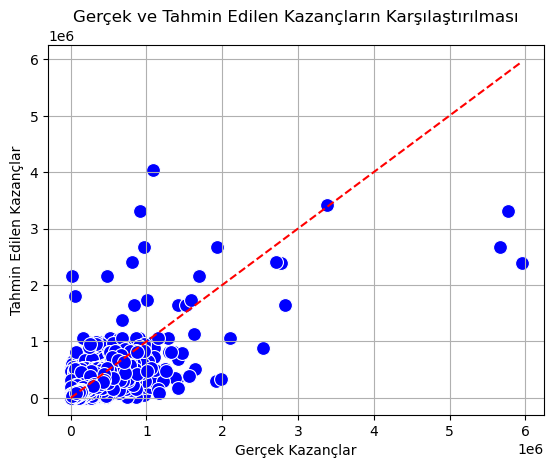

In [14]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=100) #grafik fonksiyonu kullandım x ekseninde y testi y ekseninde ise y pred değerini atadım boyutu 100 yaptım 
plt.xlabel('Gerçek Kazançlar') # x eksenine gerçek kazançlar yazdırdım 
plt.ylabel('Tahmin Edilen Kazançlar') # y eksenine tahmin edilen kazançlar yazdırdım 
plt.title('Gerçek ve Tahmin Edilen Kazançların Karşılaştırılması') # grafiğe başlık attım 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') #x ve y eksenlerinde max ve min değerlerini aldırdım 
# renk olarak kırmızı çizgi ve kesik olarak yazılmasını istedim 
plt.grid(True) # grafiğe kare ızgaralar eklettim 
plt.show() # grafiği ekrana bastırdım 